In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Storing a list with the raw audio file paths got from The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
path_1='/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/'+'Actor_'
path_full_1=[]
list_1=[]
for i in range(1,25):
  string=str(i)
  if(i<10):
    string='0'+str(i)
  path_full_1.append([path_1+string+'/'+j for j in os.listdir(path_1+string)])
  list_1.append(os.listdir(path_1+string))

# Optional dataset
# Storing a list with the raw audio file paths got from the Surrey Audio-Visual Expressed Emotion (SAVEE) Database
path_2='/content/drive/MyDrive/TherapyChatbot/SAVEE/AudioData/'
list_2=[]
path_full_2=[]
for i in ['DC','JE','JK','KL']:
  path_full_2.append([path_2+i+'/'+j for j in os.listdir(path_2+i)])
  list_2.append(os.listdir(path_2+i))

In [5]:
import librosa
audio_path = '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav'
x, sr = librosa.load(audio_path)

### creating an audio signal

In [6]:
import numpy as np
sr = 22050     # sample rate
T = 5.0      # seconds
t = np.linspace(0, T, int(T*sr), endpoint = False)
x = 0.5 * np.sin(2*np.pi*220*t)

In [71]:
import IPython.display as ipd
ipd.Audio(x, rate=sr)

In [72]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

In [73]:
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

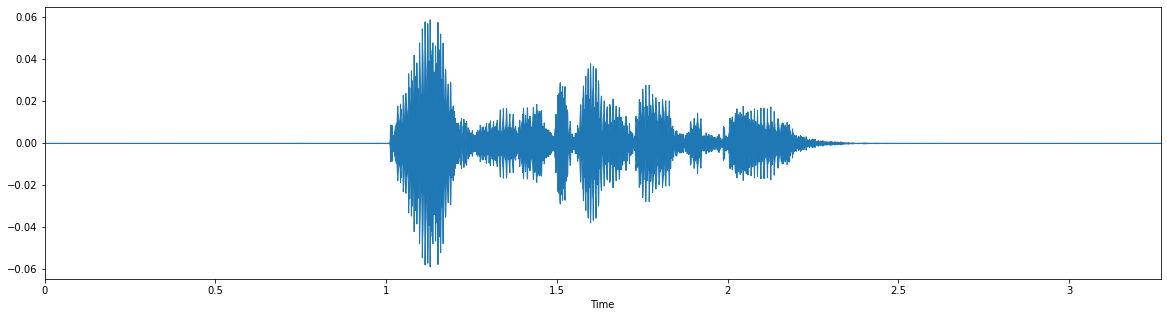

In [74]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

### Zero-Crossing Rate

- It is basically the rate at which a signal changes from positive to zero to negative or from negative to zero to positive.

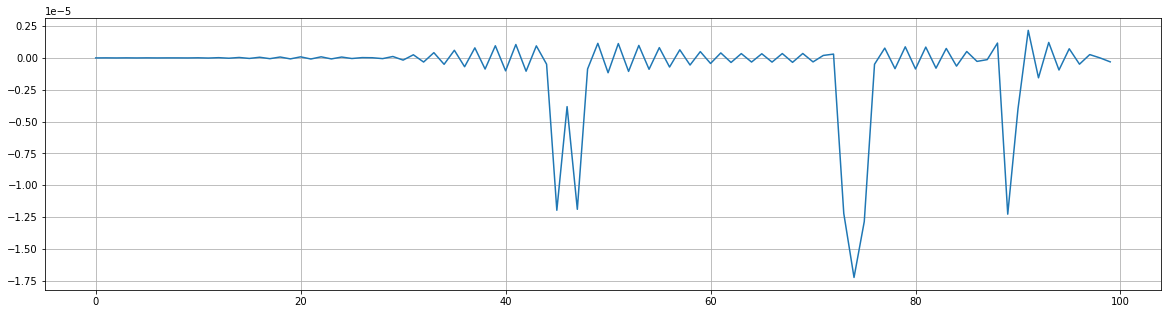

In [75]:
# Zooming in

n0 = 9000
n1 = 9100
plt.figure(figsize=(20,5))
plt.plot(x[n0:n1])
plt.grid()

In [76]:
# Counting the zero-crossings

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [77]:
print(sum(zero_crossings))

86


In [78]:
# Counting zero crossings for the entire signal

print(sum(librosa.zero_crossings(x, pad=False)))
librosa.zero_crossings(x, pad=False).shape

26020


(72102,)

Spectral Centroid
- It is basically the center of 'gravity' of the spectrum. It is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located.

Perceptually, it has a robust connection with the impression of 'brightness of a sound'.


In [79]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(141,)

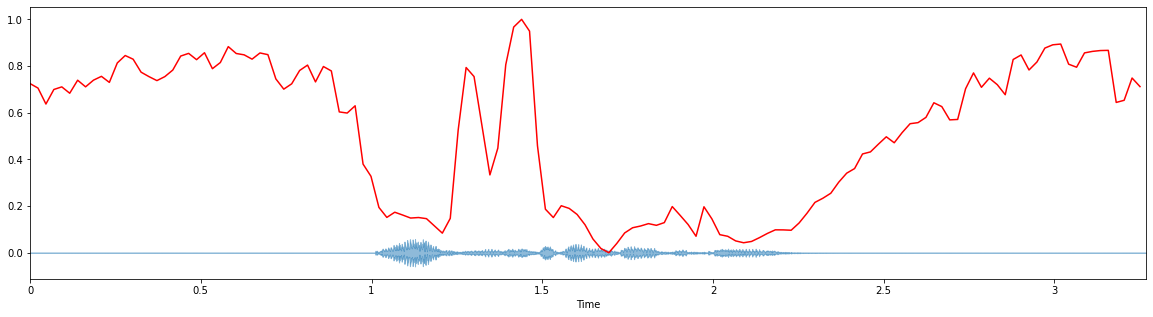

In [80]:
# Computing the time variable for visualization

plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualization

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the spectral centroid along with the waveform

librosa.display.waveplot(x, sr=sr, alpha=0.5)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral Contrast
- Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband. For more information, click here

librosa.feature.spectral_contrast computes the spectral contrast for six subbands for each time frame:

In [81]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
spectral_contrast.shape

(7, 141)

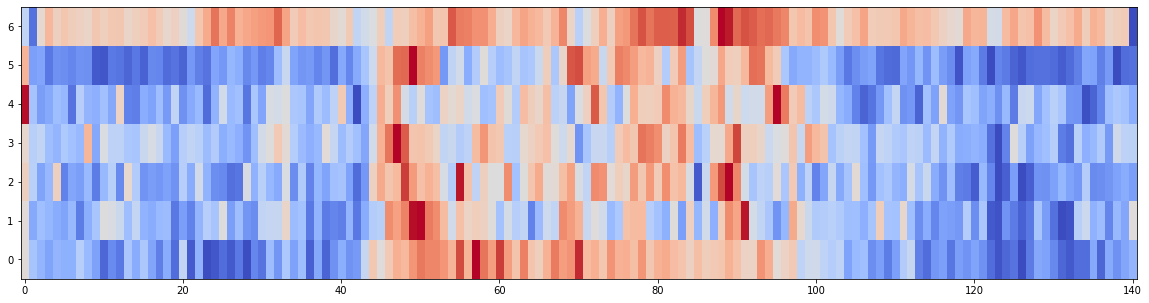

In [82]:
plt.figure(figsize=(20,5))
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')

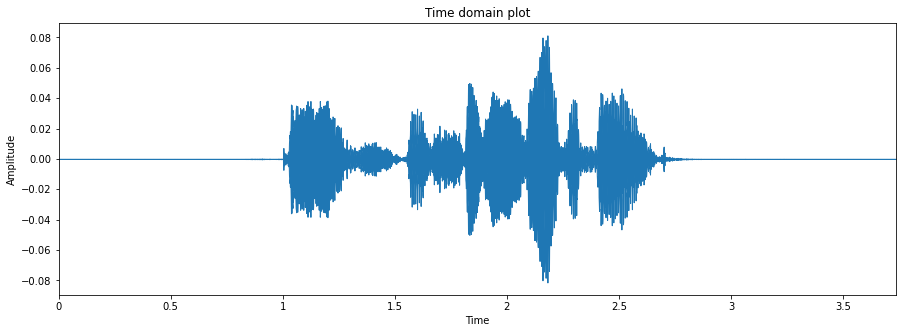

In [83]:
# Loading a calm audio wave to display
data,sampling_rate= librosa.load(path_1+"01/"+list_1[0][0])
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate);
plt.title("Time domain plot");
plt.ylabel("Amplitude");

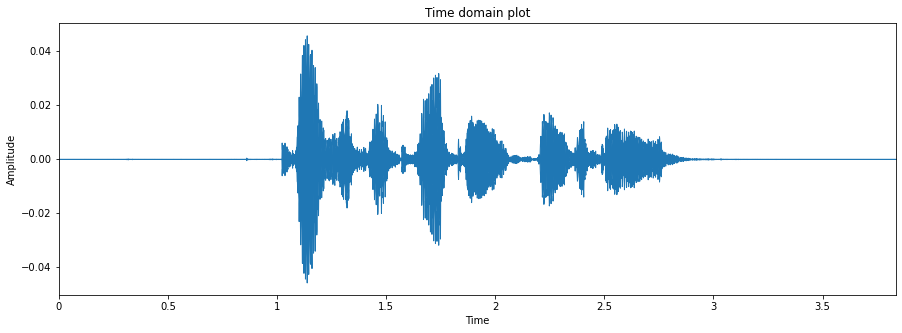

In [84]:
# Loading a happy audio wave to display
data,sampling_rate= librosa.load(path_1+"01/"+list_1[0][1])
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate);
plt.title("Time domain plot");
plt.ylabel("Amplitude");

### Exploratory Data Analysis

In [85]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

### MFCC 

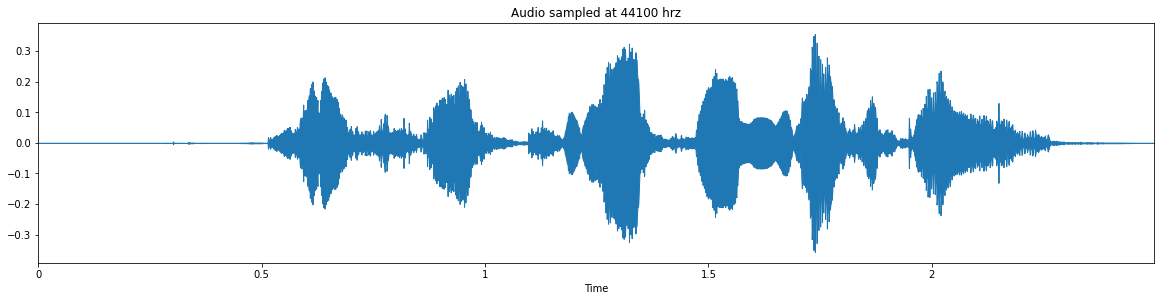

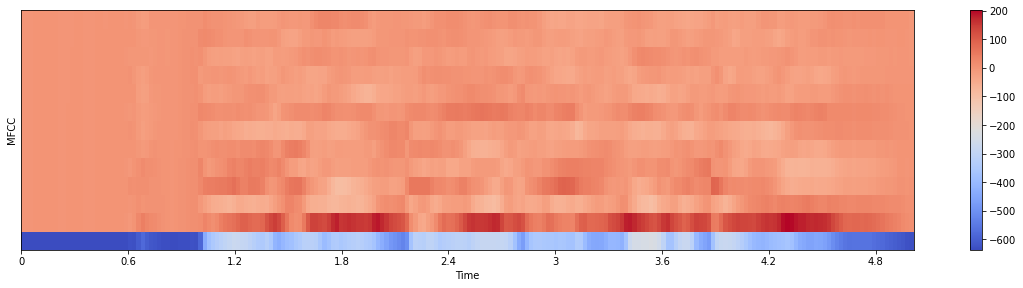

In [86]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

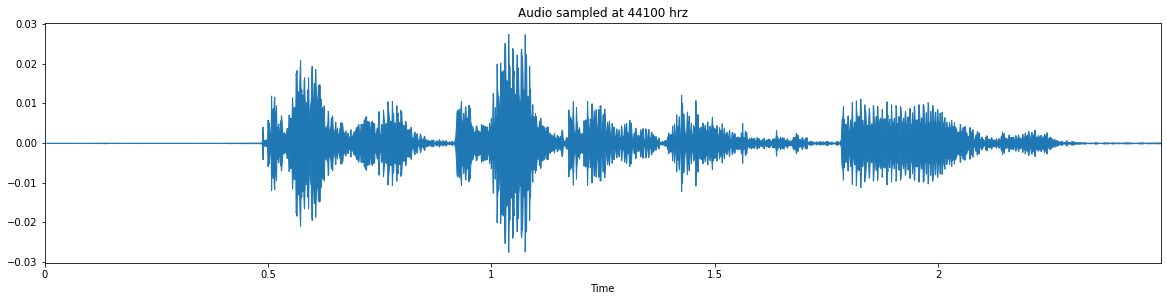

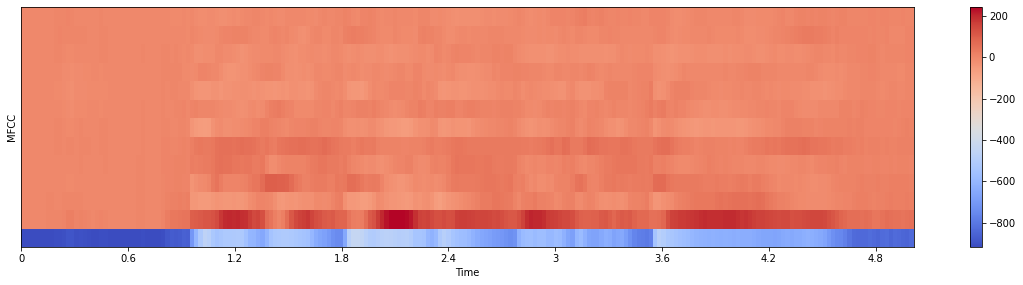

In [87]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

### Feature Scaling

- Scaling the MFCCs such that each coefficient dimension has zero mean and unit variance.

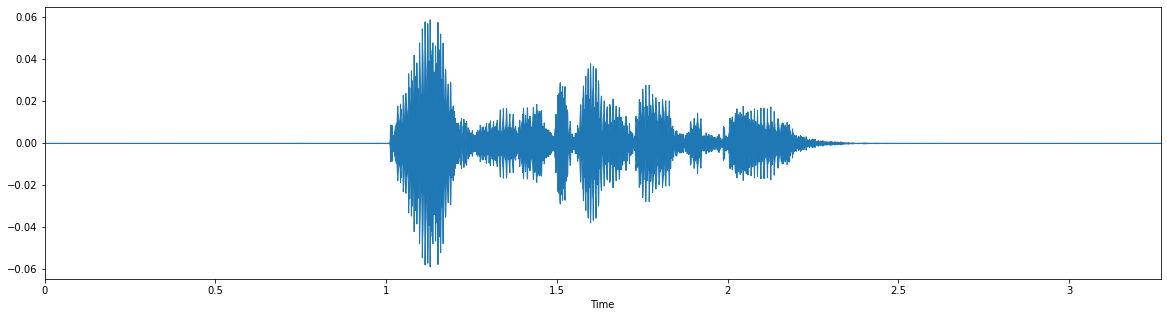

In [88]:
plt.figure(figsize=(20,5))
x, sr = librosa.load(audio_path)
librosa.display.waveplot(x, sr=sr)

(20, 141)


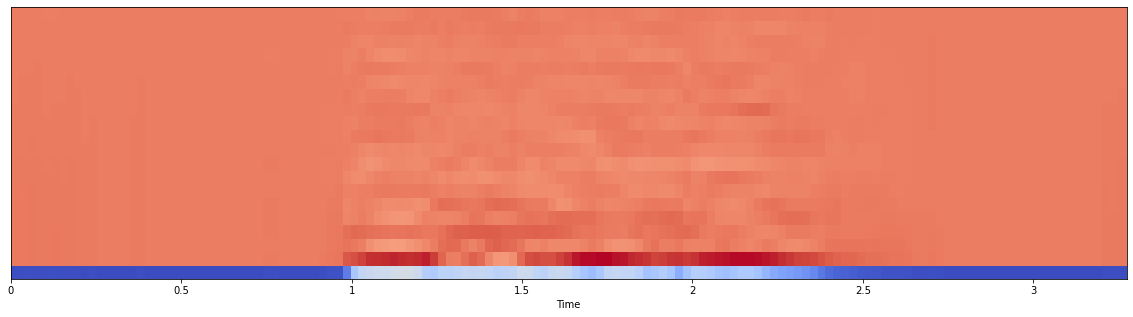

In [89]:
# MFCC

plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Feature Scaling

In [90]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 2.0290942e-08  2.7054590e-08  0.0000000e+00 -6.7636474e-09
  1.3527295e-08  0.0000000e+00 -1.3527295e-08  1.0145471e-08
  1.3527295e-08  4.2272799e-09  3.3818237e-09  0.0000000e+00
  0.0000000e+00  1.3527295e-08 -4.6500079e-09  0.0000000e+00
  1.0145471e-08 -6.7636474e-09  0.0000000e+00 -5.0727356e-09]
[0.9999999  1.0000001  1.         0.9999999  1.         1.
 1.         1.0000002  1.0000002  0.99999976 1.         1.0000001
 1.0000001  0.9999999  0.9999999  1.0000001  1.         1.
 1.0000001  1.        ]


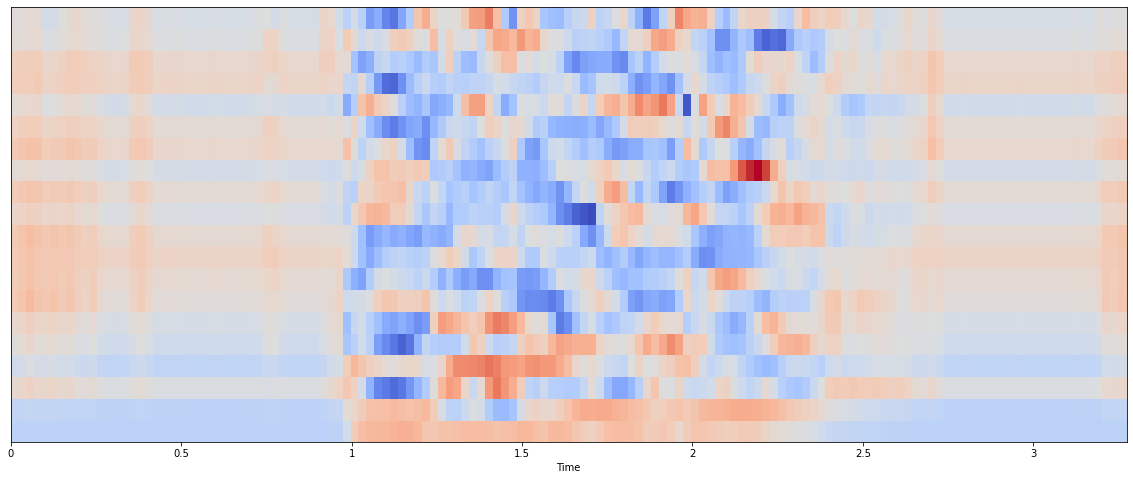

In [91]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

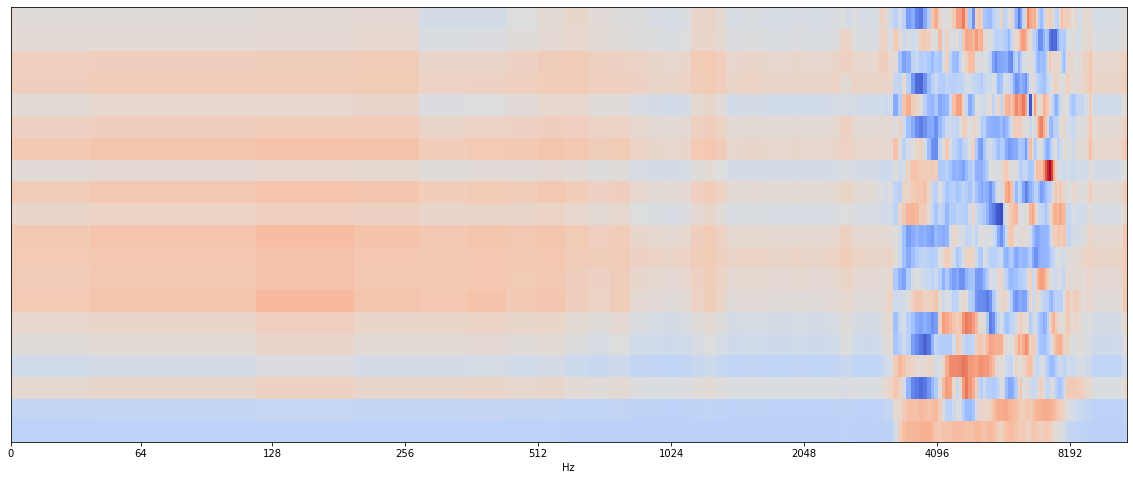

In [92]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='log')

### Chroma Frequencies

- Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

In [93]:
# Loading the file

x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

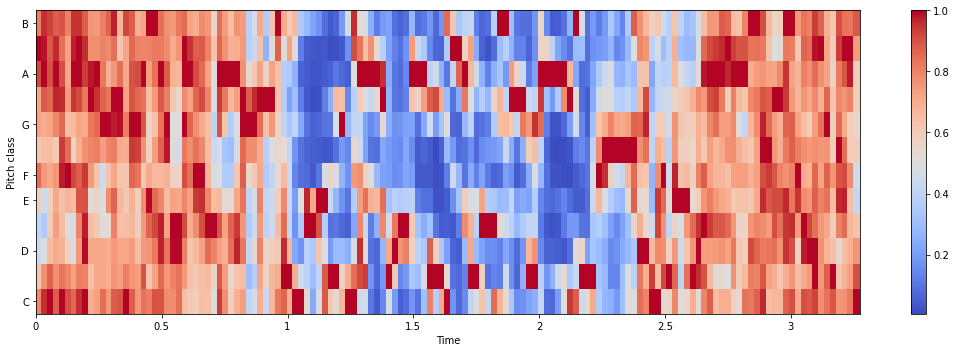

In [94]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

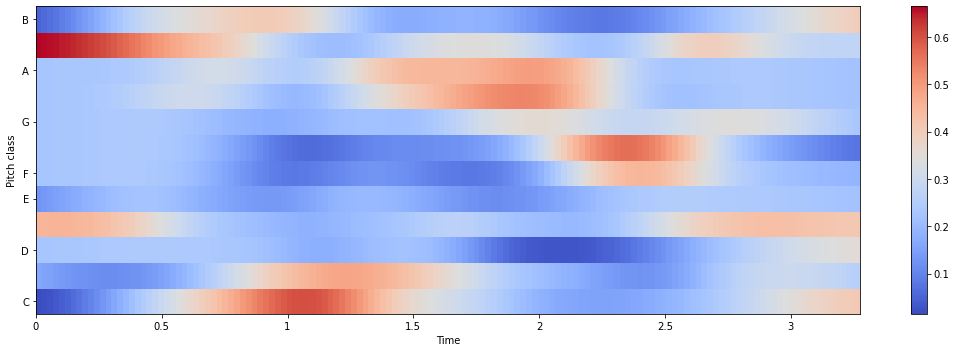

In [95]:
# Using chroma energy distribution normalized statistics (CENS),
# typically used to identify similarity between different interpretations of the music given.

hop_length = 512
chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()
plt.tight_layout()
plt.show()

### FEATURE EXTRACTION 

In [96]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import sklearn
import matplotlib.pyplot as plt
import librosa.display

In [97]:
import librosa
audio_path = '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav'

x,sr = librosa.load(audio_path)

In [98]:
import IPython.display as ipd
ipd.Audio(audio_path)

### PLOT

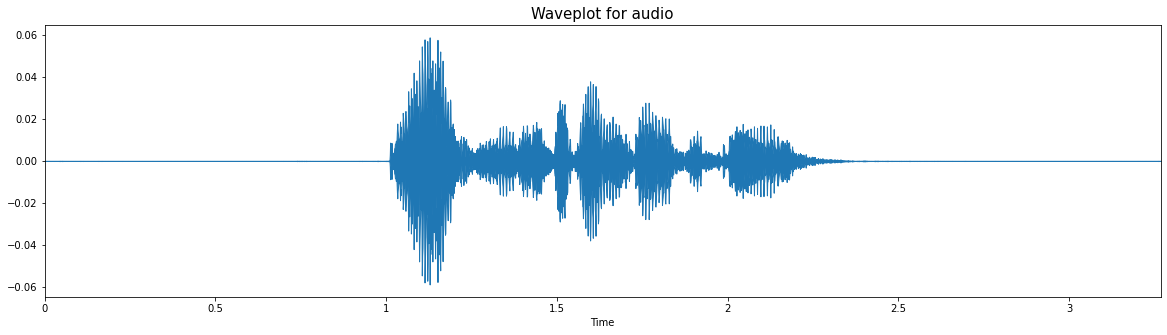

In [99]:
def create_waveplot(x, sr):
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot for audio', size=15)
    librosa.display.waveplot(x, sr=sr)
    plt.show()

# plt.figure(figsize=(20, 5))
# librosa.display.waveplot(x, sr=sr)       #create_waveplot() function for the same

create_waveplot(x, sr)


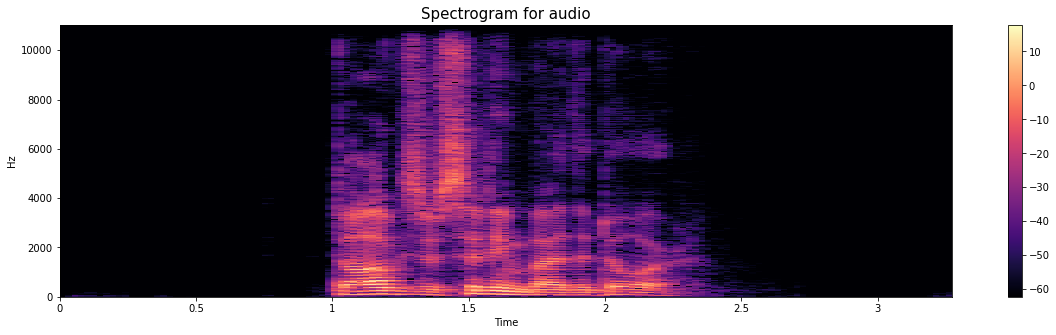

In [100]:
def create_spectogram(x, sr):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    plt.title('Spectrogram for audio', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

create_spectogram(x, sr)

# X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(20, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')    #create_spectogram() function for the same
# plt.colorbar()

### Feature Extraction

In [101]:
# n0 = 9000
# n1 = 9400
# plt.figure(figsize=(20, 5))
# plt.plot(x)
# plt.grid()

zero_crossings = librosa.zero_crossings(x, pad=False)
zero_crossings.shape

# print(sum(zero_crossings))

(72102,)

MFCC

(20, 141)


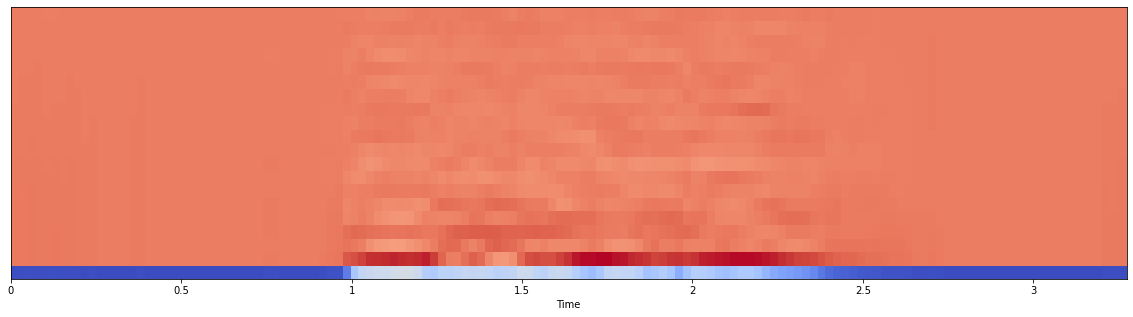

In [102]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Spectral Centroid

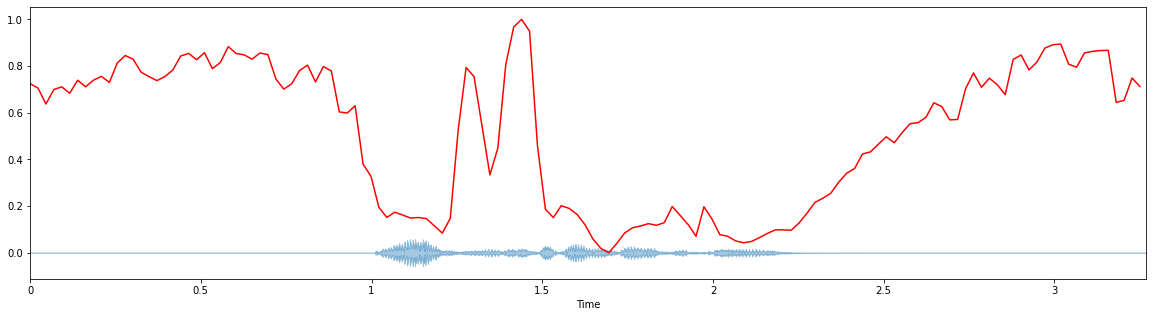

In [103]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0] 
# spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(20,5))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


MFCC

[ 2.0290942e-08  2.7054590e-08  0.0000000e+00 -6.7636474e-09
  1.3527295e-08  0.0000000e+00 -1.3527295e-08  1.0145471e-08
  1.3527295e-08  4.2272799e-09  3.3818237e-09  0.0000000e+00
  0.0000000e+00  1.3527295e-08 -4.6500079e-09  0.0000000e+00
  1.0145471e-08 -6.7636474e-09  0.0000000e+00 -5.0727356e-09]
[0.9999999  1.0000001  1.         0.9999999  1.         1.
 1.         1.0000002  1.0000002  0.99999976 1.         1.0000001
 1.0000001  0.9999999  0.9999999  1.0000001  1.         1.
 1.0000001  1.        ]


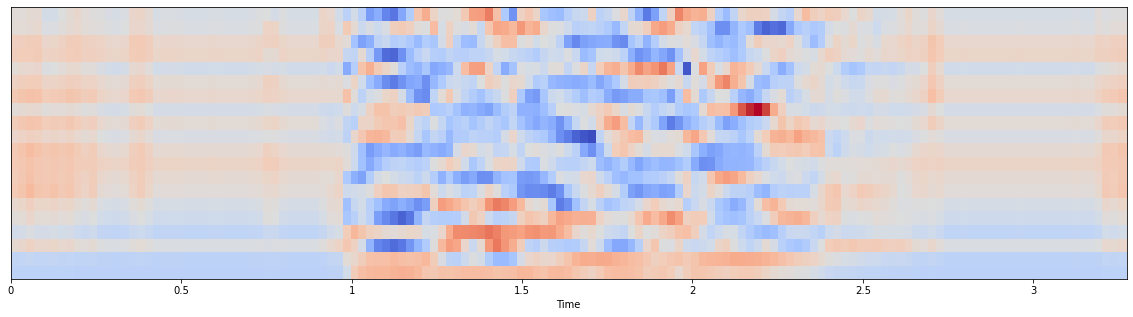

In [104]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


In [105]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

def features(x, sr):
    result = np.array([])

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=x).T, axis=0)
    result=np.hstack((result, zcr)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Chroma_stft
    stft = np.abs(librosa.stft(x))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) 

    # Spectral Centroid
    speCen = np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)[0])
    result = np.hstack((result, speCen))

      # spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0] 
      # t = librosa.frames_to_time(range(len(spectral_centroids)))
      # # librosa.display.waveplot(x, sr=sr, alpha=0.4)
      # plt.plot(t, normalize(spectral_centroids), color='r')
    
    # Spectral Rolloff
    specRollOff = np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr))
    result = np.hstack((result, specRollOff))

    # Fourier Tempogram
    fourierTempgram = np.mean(librosa.feature.fourier_tempogram(y=x, sr=sr))
    result = np.hstack((result, fourierTempgram))
 
    return result


features(x, sr)

array([ 3.56860871e-01+0.j        , -6.91770142e+02+0.j        ,
        5.83506470e+01+0.j        , -1.65160105e-01+0.j        ,
        1.39521255e+01+0.j        ,  5.05332279e+00+0.j        ,
        1.48932600e+00+0.j        , -2.39742923e+00+0.j        ,
       -5.05906487e+00+0.j        , -1.06380024e+01+0.j        ,
       -3.34419680e+00+0.j        ,  2.64549583e-01+0.j        ,
       -2.52910709e+00+0.j        ,  1.54861224e+00+0.j        ,
       -3.13230300e+00+0.j        , -2.28504968e+00+0.j        ,
        1.17953694e+00+0.j        , -5.22214365e+00+0.j        ,
       -2.82803535e+00+0.j        , -1.69575036e-01+0.j        ,
        3.28943551e-01+0.j        ,  7.69346654e-01+0.j        ,
        7.96819270e-01+0.j        ,  7.92132199e-01+0.j        ,
        7.99599349e-01+0.j        ,  7.58836806e-01+0.j        ,
        6.80383146e-01+0.j        ,  6.75741851e-01+0.j        ,
        7.22137570e-01+0.j        ,  7.66105354e-01+0.j        ,
        7.54845262e-01+0.

In [106]:
import warnings
warnings.filterwarnings('ignore')

import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os


In [107]:
from google.colab import drive
drive.mount('/content/drive')

dataset = '/content/drive/MyDrive/TherapyChatbot/Ravdess/audio_speech_actors_01-24/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
actor_folders = os.listdir(dataset)
actor_folders.sort() 
actor_folders

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [109]:
emotions = []
gender = []
actor_ID = []
file_path = []
for i in actor_folders:
    filename = os.listdir(dataset + i) #iterate over Actor folders
    for f in filename: # go through files in the corresponding Actor's folder
        part = f.split('.')[0].split('-')#We split the file name initially as['03-01-01-01-01-01-01','wav'];Now,the 0th element is converted as ['03','01','01','01','01','01','01']
        emotions.append(int(part[2])) #Since,the second element represents the emotion of the actor.
        actor_ID.append(int(part[6])) #Since,the sixth element represents the ID of the actor.
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female" #Since,even IDs correspond to females.
        else:
            bg = "male"  #Since,odd IDs correspond to females.
        gender.append(bg)
        file_path.append(dataset + i + '/' + f)

#Creating a dataframe:
audio_df = pd.DataFrame(emotions)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor_ID)],axis=1)
audio_df.columns = ['Gender','Emotion','Actor_ID']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['Path'])],axis=1)
audio_df

Gender  ...                                               Path
0       male  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
1       male  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
2       male  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
3       male  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
4       male  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
...      ...  ...                                                ...
1435  female  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
1436  female  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
1437  female  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
1438  female  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...
1439  female  ...  /content/drive/MyDrive/TherapyChatbot/Ravdess/...

[1440 rows x 4 columns]

In [110]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    return result

In [111]:
path = np.array(audio_df.Path)[1]
data, sample_rate = librosa.load(path)

X, Y = [], []
for path, emotion in zip(audio_df.Path, audio_df.Emotion):
    feature = get_features(path)
    # for ele in feature:
    #     X.append(ele)
    #     Y.append(emotion)
    X.append(feature)
    Y.append(emotion)

In [112]:
X

[array([ 1.95466218e-01,  6.28031611e-01,  6.87169254e-01,  6.51984692e-01,
         6.21272683e-01,  6.04191601e-01,  6.40623391e-01,  6.26135767e-01,
         6.52430296e-01,  6.85133696e-01,  6.53013587e-01,  6.49654388e-01,
         6.32399797e-01, -5.35881226e+02,  8.22813568e+01, -9.01055145e+00,
         2.08422832e+01,  5.42183161e+00, -3.75433898e+00, -1.05414991e+01,
        -1.34657717e+01, -2.79176807e+01, -6.89457178e+00, -3.80946541e+00,
        -1.04292822e+01,  1.57544971e-01, -7.95377684e+00, -6.01167822e+00,
         2.45667362e+00, -1.04480286e+01, -6.48525715e+00, -4.68783045e+00,
        -3.55344677e+00,  2.24263385e-06,  2.37687145e-05,  4.89857746e-04,
         1.62509661e-02,  1.10549934e-01,  1.86236024e-01,  1.99403018e-01,
         2.40033194e-02,  2.72399820e-02,  7.81815723e-02,  1.23827301e-01,
         5.02685979e-02,  1.00855082e-01,  1.90479651e-01,  1.82559043e-01,
         2.86977321e-01,  1.97171912e-01,  8.01231340e-02,  9.67019200e-02,
         1.5

In [14]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
Features = pd.read_csv('/content/drive/MyDrive/TherapyChatbot/features.csv')
Features.head()

0         1         2  ...       159           160  labels
0  0.195466  0.628032  0.687169  ...  0.000031  2.326331e-06     sad
1  0.207284  0.692981  0.737456  ...  0.000008  4.218449e-07     sad
2  0.209554  0.449416  0.545140  ...  0.013041  1.307841e-03   angry
3  0.251194  0.641277  0.676712  ...  0.000009  5.158842e-07   happy
4  0.168475  0.536939  0.639066  ...  0.001584  1.105903e-04   angry

[5 rows x 162 columns]

In [7]:
Features.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '152', '153', '154', '155', '156', '157', '158', '159', '160',
       'labels'],
      dtype='object', length=162)

In [9]:
# Features and target columns
X = Features.drop('labels', axis = 1).values
y = Features['labels'].values

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20)

In [11]:
# print some details
# number of samples in training data
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 1152
[+] Number of testing samples: 288


### XGB Classifier

In [12]:
steps = [('scaler', StandardScaler()),
        ('xgb', XGBClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
xgb_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
xgb_unscaled = XGBClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(xgb_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(xgb_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5625
Accuracy without Scaling: 0.5486111111111112


In [15]:
xgb_predictions = xgb_scaled.predict(X_test) 
print(classification_report(y_test,xgb_predictions)) 

              precision    recall  f1-score   support

       angry       0.63      0.74      0.68        42
        calm       0.56      0.77      0.65        35
     disgust       0.56      0.52      0.54        42
        fear       0.63      0.55      0.59        47
       happy       0.43      0.32      0.37        37
     neutral       0.33      0.25      0.29        20
         sad       0.58      0.53      0.55        34
    surprise       0.57      0.68      0.62        31

    accuracy                           0.56       288
   macro avg       0.54      0.55      0.54       288
weighted avg       0.55      0.56      0.55       288



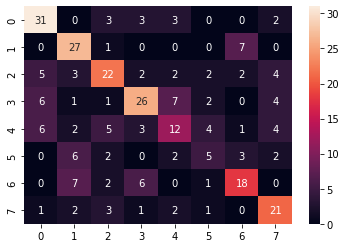

In [16]:
matrix = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(matrix, annot= True)

### Building SVM Classifier

In [17]:
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.46875
Accuracy without Scaling: 0.4826388888888889


In [18]:
svm_predictions = svc_scaled.predict(X_test) 
print(classification_report(y_test,svm_predictions)) 

              precision    recall  f1-score   support

       angry       0.53      0.55      0.54        42
        calm       0.51      0.86      0.64        35
     disgust       0.43      0.43      0.43        42
        fear       0.70      0.34      0.46        47
       happy       0.42      0.27      0.33        37
     neutral       1.00      0.05      0.10        20
         sad       0.34      0.47      0.40        34
    surprise       0.43      0.68      0.53        31

    accuracy                           0.47       288
   macro avg       0.54      0.46      0.43       288
weighted avg       0.53      0.47      0.45       288



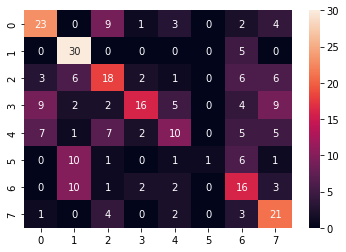

In [19]:
matrix = confusion_matrix(y_test, svm_predictions)
sns.heatmap(matrix, annot= True)

### Building Decision Tree Classifier

In [20]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('DT', DecisionTreeClassifier(max_depth = 6))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
dt_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
dt_unscaled = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(dt_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(dt_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.3506944444444444
Accuracy without Scaling: 0.34375


In [21]:
dtree_predictions = dt_unscaled.predict(X_test) 
print(classification_report(y_test,dtree_predictions)) 

              precision    recall  f1-score   support

       angry       0.76      0.45      0.57        42
        calm       0.42      0.46      0.44        35
     disgust       0.40      0.40      0.40        42
        fear       0.59      0.21      0.31        47
       happy       0.17      0.24      0.20        37
     neutral       0.16      0.20      0.18        20
         sad       0.25      0.41      0.31        34
    surprise       0.30      0.32      0.31        31

    accuracy                           0.34       288
   macro avg       0.38      0.34      0.34       288
weighted avg       0.41      0.34      0.35       288



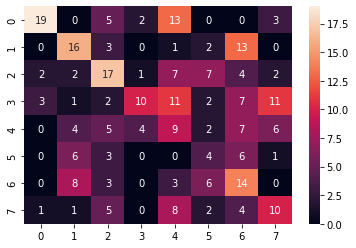

In [22]:
matrix = confusion_matrix(y_test, dtree_predictions)
sns.heatmap(matrix, annot= True)

In [114]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('/content/drive/MyDrive/TherapyChatbot/features.csv', index=False)
Features.head()

0         1         2  ...       159           160  labels
0  0.195466  0.628032  0.687169  ...  0.000031  2.326331e-06     sad
1  0.207284  0.692981  0.737456  ...  0.000008  4.218449e-07     sad
2  0.209554  0.449416  0.545140  ...  0.013041  1.307841e-03   angry
3  0.251194  0.641277  0.676712  ...  0.000009  5.158842e-07   happy
4  0.168475  0.536939  0.639066  ...  0.001584  1.105903e-04   angry

[5 rows x 162 columns]

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

X = Features.iloc[: ,:-1].values
y = Features['labels'].values

encoder = OneHotEncoder()
y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1152, 161), (1152, 8), (288, 161), (288, 8))

In [117]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

### MLP

Epoch 1/1000
5/5 [==============================] - 3s 70ms/step - loss: 2.0451 - accuracy: 0.1337 - val_loss: 1.9822 - val_accuracy: 0.1701
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 1.9443 - accuracy: 0.2179 - val_loss: 1.9498 - val_accuracy: 0.2118
Epoch 3/1000
5/5 [==============================] - 0s 11ms/step - loss: 1.9006 - accuracy: 0.2500 - val_loss: 1.9232 - val_accuracy: 0.2292
Epoch 4/1000
5/5 [==============================] - 0s 11ms/step - loss: 1.8558 - accuracy: 0.2760 - val_loss: 1.8926 - val_accuracy: 0.2708
Epoch 5/1000
5/5 [==============================] - 0s 14ms/step - loss: 1.8111 - accuracy: 0.3307 - val_loss: 1.8557 - val_accuracy: 0.2882
Epoch 6/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.7625 - accuracy: 0.3741 - val_loss: 1.8140 - val_accuracy: 0.2951
Epoch 7/1000
5/5 [==============================] - 0s 12ms/step - loss: 1.7103 - accuracy: 0.3837 - val_loss: 1.7711 - val_accuracy: 0.3090
Epoch 8/1000


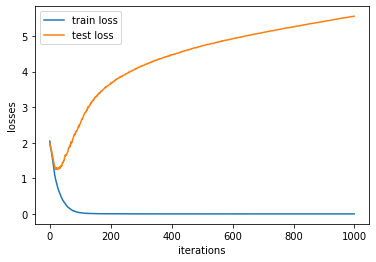

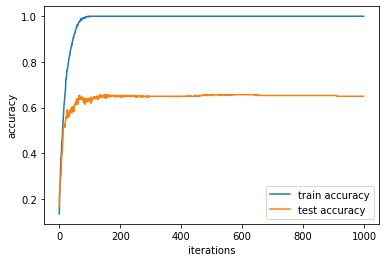

In [60]:
from matplotlib import pyplot as plt
#building MLP model 
from keras import models
from keras import layers
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=256,epochs = 1000,verbose=1,validation_data=(X_test,y_test))

plotter(history)

model.summary()
result = model.evaluate(X_test,y_test)
print(result)

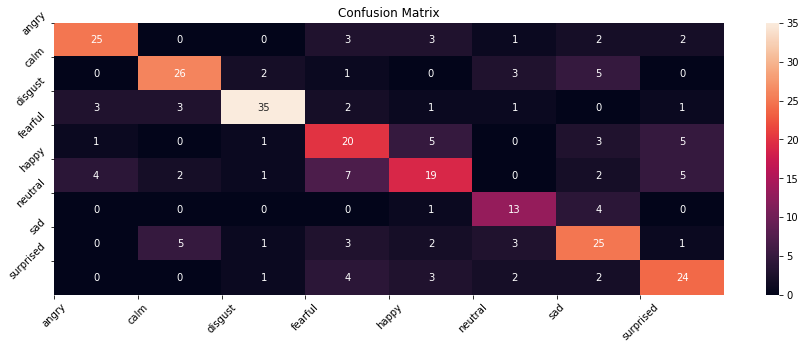

In [63]:
import seaborn as sns

y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(15, 5))
sns.heatmap(confusion_mtx, annot=True)
plt.xticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.yticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.76      0.69      0.72        36
        calm       0.72      0.70      0.71        37
     disgust       0.85      0.76      0.80        46
     fearful       0.50      0.57      0.53        35
       happy       0.56      0.47      0.51        40
     neutral       0.57      0.72      0.63        18
         sad       0.58      0.62      0.60        40
   surprised       0.63      0.67      0.65        36

    accuracy                           0.65       288
   macro avg       0.65      0.65      0.65       288
weighted avg       0.66      0.65      0.65       288



### CNN

In [7]:
Features = pd.read_csv('/content/drive/MyDrive/TherapyChatbot/features.csv')
Features.head()

0         1         2  ...       159           160  labels
0  0.195466  0.628032  0.687169  ...  0.000031  2.326331e-06     sad
1  0.207284  0.692981  0.737456  ...  0.000008  4.218449e-07     sad
2  0.209554  0.449416  0.545140  ...  0.013041  1.307841e-03   angry
3  0.251194  0.641277  0.676712  ...  0.000009  5.158842e-07   happy
4  0.168475  0.536939  0.639066  ...  0.001584  1.105903e-04   angry

[5 rows x 162 columns]

In [124]:
from sklearn.utils import shuffle
temp = shuffle(Features)
# temp[:10]

In [125]:
df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]

In [126]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [127]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [128]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [129]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [131]:
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers

model = models.Sequential()

model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(lr=0.0001)

In [132]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [133]:
history=model.fit(x_traincnn, y_train, batch_size=256, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
5/5 [==============================] - 9s 235ms/step - loss: 3.9957 - accuracy: 0.1471 - val_loss: 2.0874 - val_accuracy: 0.1415
Epoch 2/1000
5/5 [==============================] - 0s 41ms/step - loss: 3.1860 - accuracy: 0.1318 - val_loss: 2.0840 - val_accuracy: 0.1692
Epoch 3/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.7860 - accuracy: 0.1300 - val_loss: 2.0787 - val_accuracy: 0.2031
Epoch 4/1000
5/5 [==============================] - 0s 37ms/step - loss: 2.5080 - accuracy: 0.1327 - val_loss: 2.0661 - val_accuracy: 0.2123
Epoch 5/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.4073 - accuracy: 0.1309 - val_loss: 2.0634 - val_accuracy: 0.2123
Epoch 6/1000
5/5 [==============================] - 0s 38ms/step - loss: 2.2628 - accuracy: 0.1570 - val_loss: 2.0653 - val_accuracy: 0.2308
Epoch 7/1000
5/5 [==============================] - 0s 36ms/step - loss: 2.2329 - accuracy: 0.1525 - val_loss: 2.0623 - val_accuracy: 0.2154
Epoch 8/1000

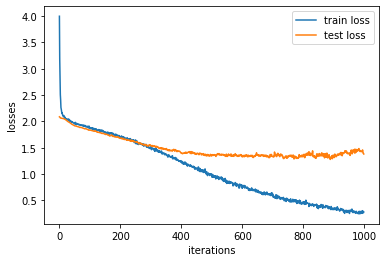

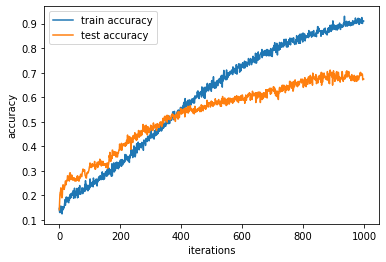

In [134]:
plotter(history)

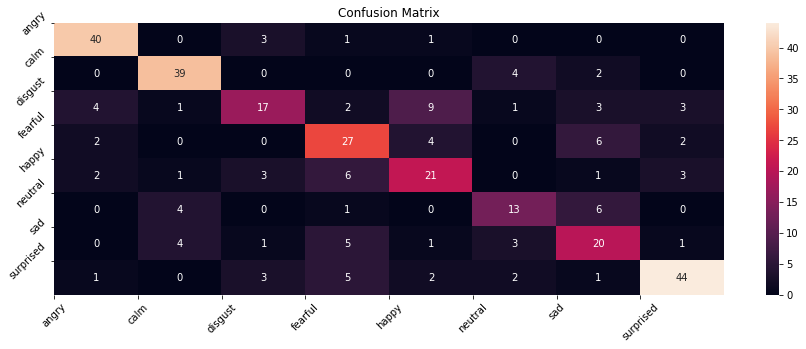

In [135]:
import seaborn as sns

y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(15, 5))
sns.heatmap(confusion_mtx, annot=True)
plt.xticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.yticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [136]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.82      0.89      0.85        45
        calm       0.80      0.87      0.83        45
     disgust       0.63      0.42      0.51        40
     fearful       0.57      0.66      0.61        41
       happy       0.55      0.57      0.56        37
     neutral       0.57      0.54      0.55        24
         sad       0.51      0.57      0.54        35
   surprised       0.83      0.76      0.79        58

    accuracy                           0.68       325
   macro avg       0.66      0.66      0.66       325
weighted avg       0.68      0.68      0.68       325



### LSTM

In [8]:
Features = pd.read_csv('/content/drive/MyDrive/TherapyChatbot/features.csv')
Features.head()

0         1         2  ...       159           160  labels
0  0.195466  0.628032  0.687169  ...  0.000031  2.326331e-06     sad
1  0.207284  0.692981  0.737456  ...  0.000008  4.218449e-07     sad
2  0.209554  0.449416  0.545140  ...  0.013041  1.307841e-03   angry
3  0.251194  0.641277  0.676712  ...  0.000009  5.158842e-07   happy
4  0.168475  0.536939  0.639066  ...  0.001584  1.105903e-04   angry

[5 rows x 162 columns]

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [10]:
from sklearn.utils import shuffle
temp = shuffle(Features)
# temp[:10]


df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]


trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# making our data compatible to model.
x_train = np.expand_dims(X_train, axis=2)
x_test = np.expand_dims(X_test, axis=2)

In [12]:
print('Train dimension:')
print(x_train.shape)
print('Test dimension:')
print(x_test.shape)

print('Train labels dimension:')
print(y_train.shape)
print('Test labels dimension:')
print(y_test.shape)

Train dimension:
(1131, 161, 1)
Test dimension:
(309, 161, 1)
Train labels dimension:
(1131, 8)
Test labels dimension:
(309, 8)


In [13]:
# LSTM Classifier
import keras
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2

from tensorflow.keras import layers,regularizers,models
from tensorflow import keras

In [14]:
model = Sequential()
model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(LSTM(128, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Flatten())

# model.add(Dense(32))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('softmax'))


# model = Sequential()
# model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=True))
# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(32))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('softmax'))


# model = models.Sequential([
#         layers.BatchNormalization(input_shape=(x_train.shape[1], 1)),
#         layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
#         layers.Dropout(0.2),
#         layers.BatchNormalization(),
#         layers.Dense(8,activation='softmax'),
# ])

# opt = keras.optimizers.Adam(learning_rate=0.001)
# Configures the model for training
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 161, 1)           4         
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 161, 256)          264192    
                                                                 
 lstm_1 (LSTM)               (None, 161, 256)          525312    
                                                                 
 lstm_2 (LSTM)               (None, 161, 128)          197120    
                                                                 
 batch_normalization_1 (Batc  (None, 161, 128)         512       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 20608)             0

In [15]:
# Training the model
history=model.fit(x_train, y_train, batch_size=256, epochs=1000, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/1000
5/5 [==============================] - 13s 662ms/step - loss: 7.8794 - accuracy: 0.1256 - val_loss: 2.0875 - val_accuracy: 0.1618
Epoch 2/1000
5/5 [==============================] - 1s 270ms/step - loss: 2.6164 - accuracy: 0.1760 - val_loss: 2.0637 - val_accuracy: 0.2039
Epoch 3/1000
5/5 [==============================] - 1s 270ms/step - loss: 1.9147 - accuracy: 0.2317 - val_loss: 2.0573 - val_accuracy: 0.2298
Epoch 4/1000
5/5 [==============================] - 1s 272ms/step - loss: 1.9398 - accuracy: 0.2546 - val_loss: 2.0432 - val_accuracy: 0.2395
Epoch 5/1000
5/5 [==============================] - 1s 268ms/step - loss: 1.9966 - accuracy: 0.2485 - val_loss: 2.0537 - val_accuracy: 0.2039
Epoch 6/1000
5/5 [==============================] - 1s 271ms/step - loss: 1.8488 - accuracy: 0.2918 - val_loss: 2.0429 - val_accuracy: 0.2233
Epoch 7/1000
5/5 [==============================] - 1s 270ms/step - loss: 2.0447 - accuracy: 0.2007 - val_loss: 2.0640 - val_accuracy: 0.1942
Epoch

10/10 [==============================] - 1s 67ms/step - loss: 3.6700 - accuracy: 0.6667
Accuracy of our model on test data :  66.66666865348816 %


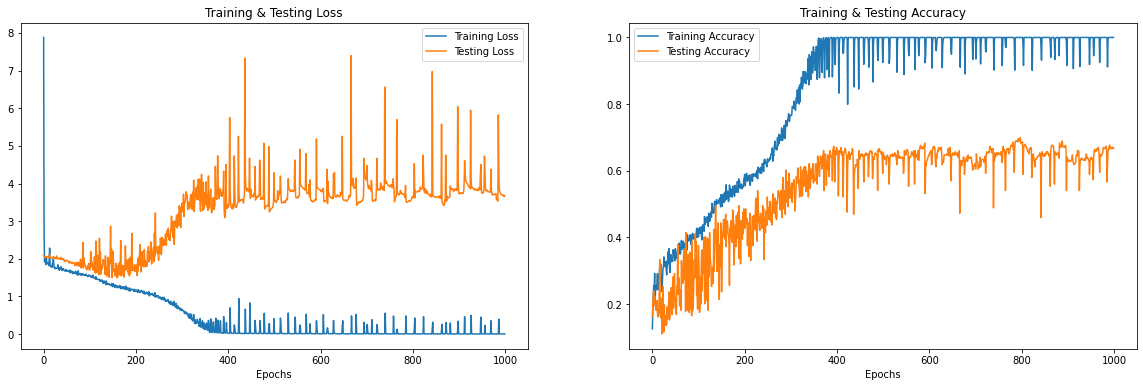

In [16]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(1000)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

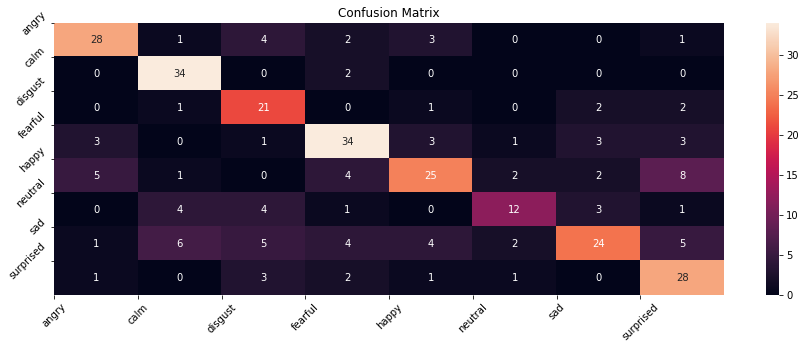

In [17]:
import seaborn as sns

y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(15, 5))
sns.heatmap(confusion_mtx, annot=True)
plt.xticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.yticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.74      0.72      0.73        39
        calm       0.72      0.94      0.82        36
     disgust       0.55      0.78      0.65        27
     fearful       0.69      0.71      0.70        48
       happy       0.68      0.53      0.60        47
     neutral       0.67      0.48      0.56        25
         sad       0.71      0.47      0.56        51
   surprised       0.58      0.78      0.67        36

    accuracy                           0.67       309
   macro avg       0.67      0.68      0.66       309
weighted avg       0.67      0.67      0.66       309



In [20]:
model = Sequential()
model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(LSTM(128, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Flatten())

# model.add(Dense(32))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('softmax'))


# model = Sequential()
# model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=True))
# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(32))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('softmax'))


# model = models.Sequential([
#         layers.BatchNormalization(input_shape=(x_train.shape[1], 1)),
#         layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
#         layers.Dropout(0.2),
#         layers.BatchNormalization(),
#         layers.Dense(8,activation='softmax'),
# ])

# opt = keras.optimizers.Adam(learning_rate=0.001)
# Configures the model for training
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 161, 1)           4         
 hNormalization)                                                 
                                                                 
 lstm_6 (LSTM)               (None, 161, 256)          264192    
                                                                 
 lstm_7 (LSTM)               (None, 161, 256)          525312    
                                                                 
 lstm_8 (LSTM)               (None, 161, 128)          197120    
                                                                 
 batch_normalization_5 (Batc  (None, 161, 128)         512       
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 20608)            

In [21]:
# Training the model
history=model.fit(x_train, y_train, batch_size=256, epochs=1000, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/1000
5/5 [==============================] - 10s 664ms/step - loss: 7.1115 - accuracy: 0.1344 - val_loss: 2.1251 - val_accuracy: 0.1165
Epoch 2/1000
5/5 [==============================] - 1s 268ms/step - loss: 3.3883 - accuracy: 0.1521 - val_loss: 2.0735 - val_accuracy: 0.1845
Epoch 3/1000
5/5 [==============================] - 1s 269ms/step - loss: 2.0265 - accuracy: 0.1883 - val_loss: 2.0698 - val_accuracy: 0.1489
Epoch 4/1000
5/5 [==============================] - 1s 266ms/step - loss: 1.9454 - accuracy: 0.2149 - val_loss: 2.0551 - val_accuracy: 0.2298
Epoch 5/1000
5/5 [==============================] - 1s 268ms/step - loss: 1.9651 - accuracy: 0.2343 - val_loss: 2.0589 - val_accuracy: 0.1715
Epoch 6/1000
5/5 [==============================] - 1s 269ms/step - loss: 1.8835 - accuracy: 0.2431 - val_loss: 2.0702 - val_accuracy: 0.1683
Epoch 7/1000
5/5 [==============================] - 1s 267ms/step - loss: 2.0654 - accuracy: 0.1874 - val_loss: 2.0496 - val_accuracy: 0.1748
Epoch

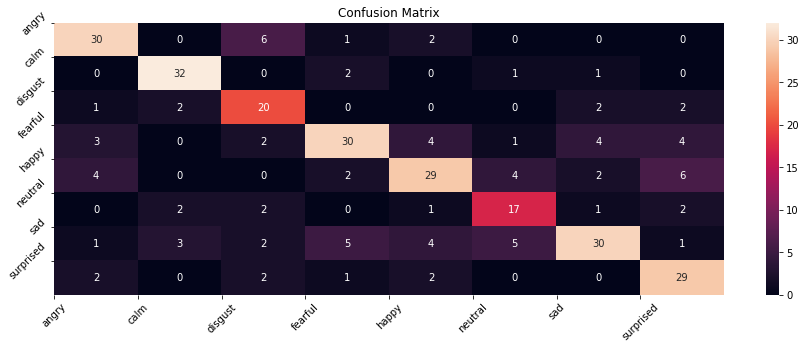

In [22]:
import seaborn as sns

y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plt.figure(figsize=(15, 5))
sns.heatmap(confusion_mtx, annot=True)
plt.xticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.yticks(list(dict_characters.keys()), list(dict_characters.values()), rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.73      0.77      0.75        39
        calm       0.82      0.89      0.85        36
     disgust       0.59      0.74      0.66        27
     fearful       0.73      0.62      0.67        48
       happy       0.69      0.62      0.65        47
     neutral       0.61      0.68      0.64        25
         sad       0.75      0.59      0.66        51
   surprised       0.66      0.81      0.73        36

    accuracy                           0.70       309
   macro avg       0.70      0.71      0.70       309
weighted avg       0.71      0.70      0.70       309

